In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import argrelmax, argrelextrema
from scipy.signal import find_peaks
from scipy.fft import fft

from onesidedcoupling import OnesidedCoupling

# Parameters


In [47]:
t_step = 0.05
t_last = 100 # 50h -> 1 point represent 1h
t = np.arange(0, 2500, t_step)
keep = int(t_last / t_step)
x = 0.5
y = 0.5
q = 0.5
p = 0.5
par = x,y,p,q
k = 0.01
gamma = 0.1
mu = 2
beta = 0.2
alpha = 2
lilie = OnesidedCoupling(par, t, keep, k, mu, gamma, alpha, beta)

## Solutions

In [26]:
xsol = lilie.x_solv()[:keep]
ysol = lilie.y_solv()[:keep]
psol = lilie.p_solv()[:keep]
qsol = lilie.q_solv()[:keep]


In [27]:
xsol_tol = lilie.duffvdpsolver_tolerance()[:keep, 0]
ysol_tol = lilie.duffvdpsolver_tolerance()[:keep, 1]

In [28]:
print(xsol)
print(xsol_tol)

[0.5        0.52529884 0.55113551 ... 1.57151324 1.54812987 1.52418057]
[0.5        0.52529317 0.55112796 ... 1.56795433 1.54448275 1.52044332]


## Find Peaks

In [29]:
xmax = lilie.maximumofplot()[0]
ymax = lilie.maximumofplot()[1]
x_amplitude = lilie.find_peaks_max()[0]
y_amplitude = lilie.find_peaks_max()[1]

# Timeseries
showing the timeseries for Van der Pol Oscillator and Duffing oscillator with the Maximum peak of the Plot.

$\gamma$ = 0.10, ß = 0.20, $\alpha$ = 2.00, $\mu$ = 2.00, x$_0$ = 0.50, y$_0$ = 0.50, p$_0$ = 0.50, q$_0$ = 0.50


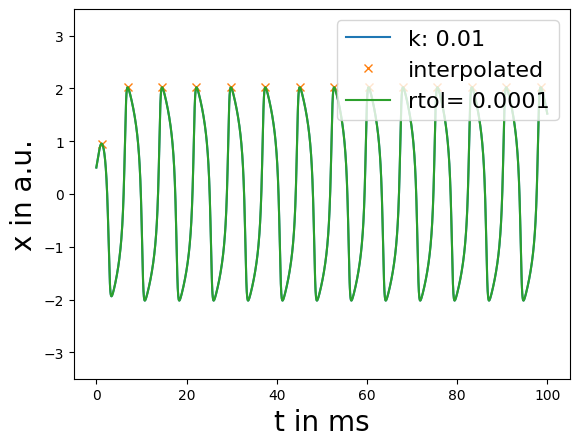

$\gamma$ = 0.10, ß = 0.20, $\alpha$ = 2.00, $\mu$ = 2.00, x$_0$ = 0.50, y$_0$ = 0.50, p$_0$ = 0.50, q$_0$ = 0.50


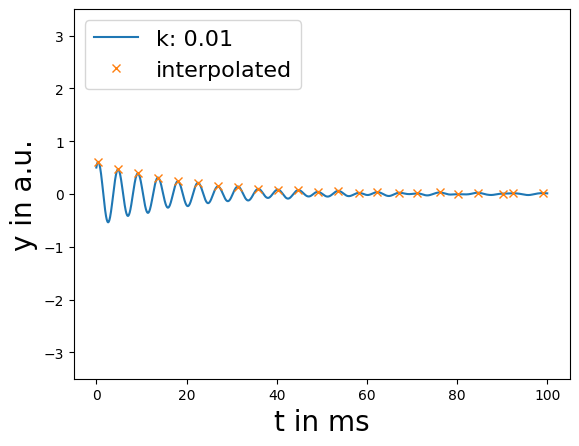

In [30]:
# x-timeseries
plt.plot(np.arange(0, t_last, t_step), xsol, label = f"k: {k:.2f}")
plt.plot([np.arange(0, t_last, t_step)[i] for i in x_amplitude[0]], x_amplitude[1]['peak_heights'], "x", label = "interpolated")
plt.plot(np.arange(0, t_last, t_step), xsol_tol, label = "rtol= 0.0001")
# plt.plot([np.arange(0, t_last, t_step)[i] for i in x_amplitude[0]], x_amplitude[1]['peak_heights'], "x", label = "max peak")

plt.ylabel("x in a.u.", fontsize = 20)
x_title = "$\gamma$ = " + f"{gamma:.2f}, ß = " + f"{beta:.2f}, $\\alpha$ = " + f"{alpha:.2f}, $\mu$ = " + f"{mu:.2f}, x$_0$ = " + f"{par[0]:.2f}, y$_0$ = "+ f"{par[1]:.2f}, p$_0$ = "+ f"{par[2]:.2f}, q$_0$ = "+ f"{par[3]:.2f}"
plt.legend(fontsize = 16, loc = "upper right")
plt.xlabel("t in ms", fontsize = 20)

plt.ylim([-3.5, 3.5])
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 16)
print(x_title)
plt.show()

# y-timeseries
plt.plot(np.arange(0, t_last, t_step), ysol, label = f"k: {k:.2f}")
plt.plot([np.arange(0, t_last, t_step)[i] for i in y_amplitude[0]], y_amplitude[1]['peak_heights'], "x", label = "interpolated")
plt.ylabel("y in a.u.", fontsize = 20)
y_title = "$\gamma$ = " + f"{gamma:.2f}, ß = " + f"{beta:.2f}, $\\alpha$ = " + f"{alpha:.2f}, $\mu$ = " + f"{mu:.2f}, x$_0$ = " + f"{par[0]:.2f}, y$_0$ = "+ f"{par[1]:.2f}, p$_0$ = "+ f"{par[2]:.2f}, q$_0$ = "+ f"{par[3]:.2f}"
plt.legend(fontsize = 16, loc = "upper left")
plt.xlabel("t in ms", fontsize = 20)
plt.ylim([-3.5, 3.5])
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 16)
print(y_title)
plt.show()

## Quadratic Interpolation

In [31]:
tx_plus = lilie.square_interpolation()[1][0]
ty_plus = lilie.square_interpolation()[1][1]
xing = lilie.square_interpolation()[0][0]
ying = lilie.square_interpolation()[0][1]

/Users/huyenanh/git_repos/daniel_model/ODE/onesidedcoupling.py:249: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(quadraticinterpolation, t[i][u], sol[i][u])


In [32]:
xing, x_amplitude[1]['peak_heights']

([np.float64(0.952375556270938),
  np.float64(2.019834949311125),
  np.float64(2.0199925524727007),
  np.float64(2.01990447738865),
  np.float64(2.019816267962824),
  np.float64(2.0199533817155952),
  np.float64(2.019852661002915),
  np.float64(2.0199907757223627),
  np.float64(2.0199011716517816),
  np.float64(2.0198145706499417),
  np.float64(2.0199503829771857),
  np.float64(2.0198498071849826),
  np.float64(2.0199889136620186),
  np.float64(2.019897895430404)],
 array([0.95210813, 2.01979968, 2.01940934, 2.0198898 , 2.0195448 ,
        2.01976662, 2.01980862, 2.0194379 , 2.01989096, 2.01952175,
        2.01978058, 2.01979693, 2.01946555, 2.01989133]))

$\gamma$ = 0.10, ß = 0.20, $\alpha$ = 2.00, $\mu$ = 2.00, x$_0$ = 0.50, y$_0$ = 0.50, p$_0$ = 0.50, q$_0$ = 0.50


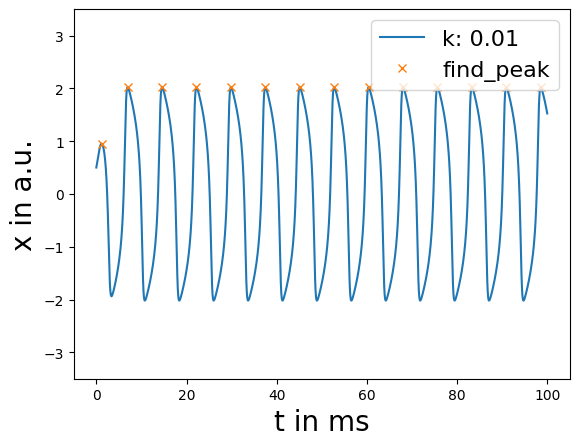

$\gamma$ = 0.10, ß = 0.20, $\alpha$ = 2.00, $\mu$ = 2.00, x$_0$ = 0.50, y$_0$ = 0.50, p$_0$ = 0.50, q$_0$ = 0.50


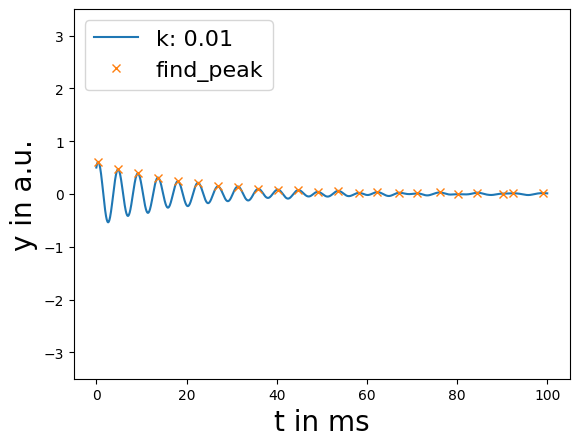

In [33]:
# x-timeseries
plt.plot(np.arange(0, t_last, t_step), xsol, label = f"k: {k:.2f}")
plt.plot(tx_plus, xing, "x", label = "find_peak")
plt.ylabel("x in a.u.", fontsize = 20)
x_title = "$\gamma$ = " + f"{gamma:.2f}, ß = " + f"{beta:.2f}, $\\alpha$ = " + f"{alpha:.2f}, $\mu$ = " + f"{mu:.2f}, x$_0$ = " + f"{par[0]:.2f}, y$_0$ = "+ f"{par[1]:.2f}, p$_0$ = "+ f"{par[2]:.2f}, q$_0$ = "+ f"{par[3]:.2f}"
plt.legend(fontsize = 16, loc = "upper right")
plt.xlabel("t in ms", fontsize = 20)

plt.ylim([-3.5, 3.5])
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 16)
print(x_title)
plt.show()

# y-timeseries
plt.plot(np.arange(0, t_last, t_step), ysol, label = f"k: {k:.2f}")
plt.plot(ty_plus, ying, "x", label = "find_peak")
plt.ylabel("y in a.u.", fontsize = 20)
y_title = "$\gamma$ = " + f"{gamma:.2f}, ß = " + f"{beta:.2f}, $\\alpha$ = " + f"{alpha:.2f}, $\mu$ = " + f"{mu:.2f}, x$_0$ = " + f"{par[0]:.2f}, y$_0$ = "+ f"{par[1]:.2f}, p$_0$ = "+ f"{par[2]:.2f}, q$_0$ = "+ f"{par[3]:.2f}"
plt.legend(fontsize = 16, loc = "upper left")
plt.xlabel("t in ms", fontsize = 20)
plt.ylim([-3.5, 3.5])
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 16)
print(y_title)
plt.show()

# Phasetime

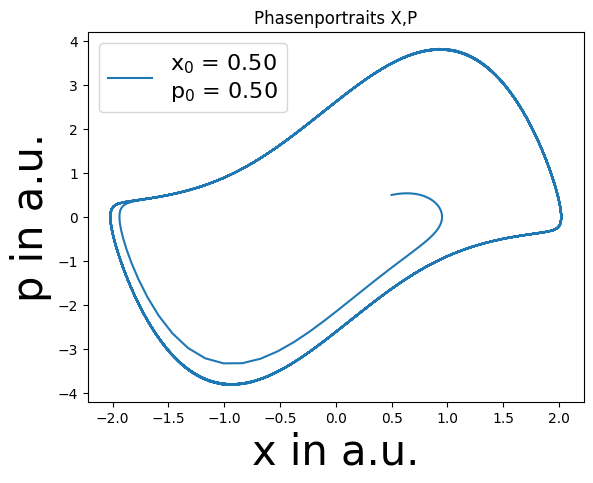

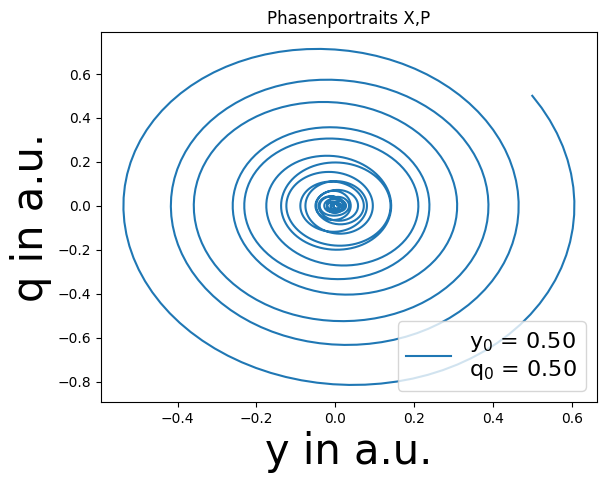

In [34]:

label = f"x$_0$ = {par[0]:.2f} \np$_0$ = {par[2]:.2f}"
plt.plot(xsol,psol,label = label)
plt.xlabel("x in a.u.",fontsize = 30)
plt.ylabel("p in a.u.",fontsize = 30)
# title = "$\gamma$ = " + f"{gamma:.2f} $\mu$ = " + f"{mu:.2f} ß =" + f"{beta:.2f} alpha = " + f"{alpha:.2f} k = " + f"{k:.2f}"
plt.legend(fontsize = 16)
plt.title("Phasenportraits X,P")
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 20)
plt.show()

label = f"y$_0$ = {par[1]:.2f} \nq$_0$ = {par[3]:.2f}"
plt.plot(ysol,qsol,label = label)
plt.xlabel("y in a.u.",fontsize = 30)
plt.ylabel("q in a.u.",fontsize = 30)
# title = "$\gamma$ = " + f"{gamma:.2f} $\mu$ = " + f"{mu:.2f} ß =" + f"{beta:.2f} alpha = " + f"{alpha:.2f} k = " + f"{k:.2f}"
plt.legend(fontsize = 16)
plt.title("Phasenportraits X,P")
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 20)
plt.show()

# Resonance Curve

In [48]:
averaging = 6

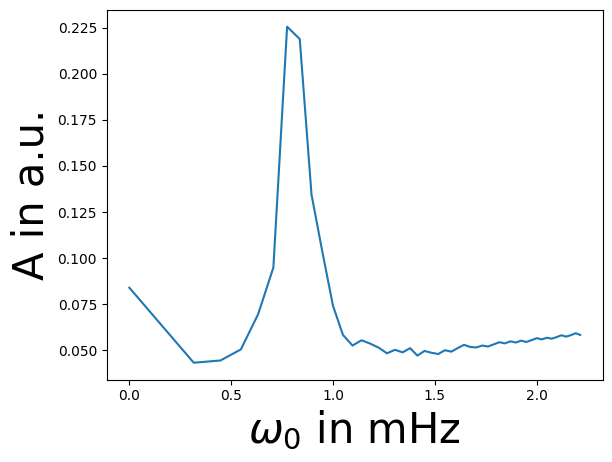

In [49]:
# findpeaks
reso_alpha = np.arange(0, 5, 0.1)
amp = [np.mean(OnesidedCoupling(par, t, keep, k, mu, gamma, i, beta).find_peaks_max()[1][1]['peak_heights'][averaging:]) for i in reso_alpha]
omega = [np.sqrt(i) for i in reso_alpha]
plt.plot(omega, amp)
plt.xlabel("$\omega _0$ in mHz", fontsize = 30)
plt.ylabel("A in a.u.",fontsize = 30)
plt.show()

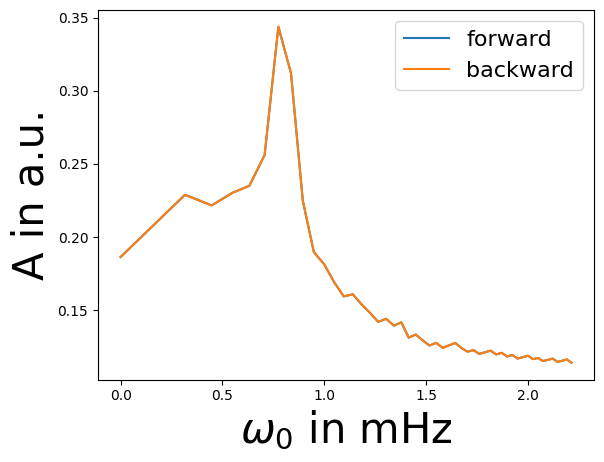

In [37]:
# interpolated peaks
reso_alpha = np.arange(0, 5, 0.1)
amp = []
for i in reso_alpha:
    try:
        interpolated = OnesidedCoupling(par, t, keep, k, mu, gamma, i, beta).square_interpolation()[0][1]
        mean = np.mean(interpolated)
        amp.append(mean)
    except:
        print("hm")

revers_amp = []
for u in reversed(reso_alpha):
    try:
        interpolated = OnesidedCoupling(par, t, keep, k, mu, gamma, u, beta).square_interpolation()[0][1]
        mean = np.mean(interpolated)
        revers_amp.append(mean)
    except:
        print("hm")

omega = [np.sqrt(i) for i in reso_alpha]
plt.plot(omega, amp, label = "forward")
plt.plot(omega[::-1], revers_amp, label = "backward")
plt.legend(fontsize = 16, loc = "upper right")
plt.xlabel("$\omega _0$ in mHz", fontsize = 30)
plt.ylabel("A in a.u.",fontsize = 30)
plt.show()

# Phase difference

/var/folders/2q/qj12d6zd1qg4x5blqbp5z8fc0000gn/T/ipykernel_49818/1551458362.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize = 16, loc = "upper right")


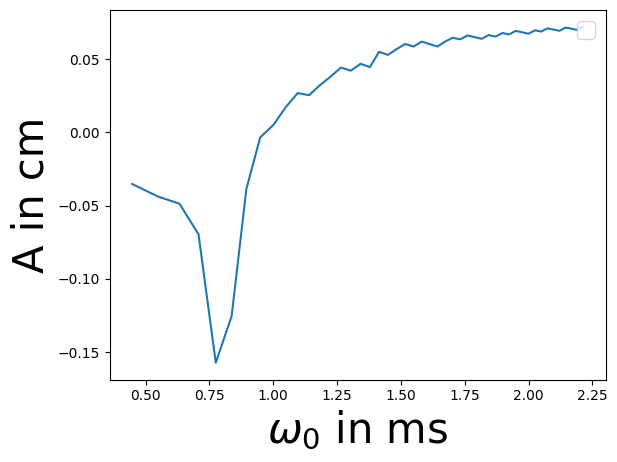

In [38]:
phaseamp = [amp[0] - i for i in amp]

plt.plot(omega[2:], phaseamp[2:])
plt.legend(fontsize = 16, loc = "upper right")
plt.xlabel("$\omega _0$ in ms", fontsize = 30)
plt.ylabel("A in cm",fontsize = 30)
plt.show()

# Randomstuff

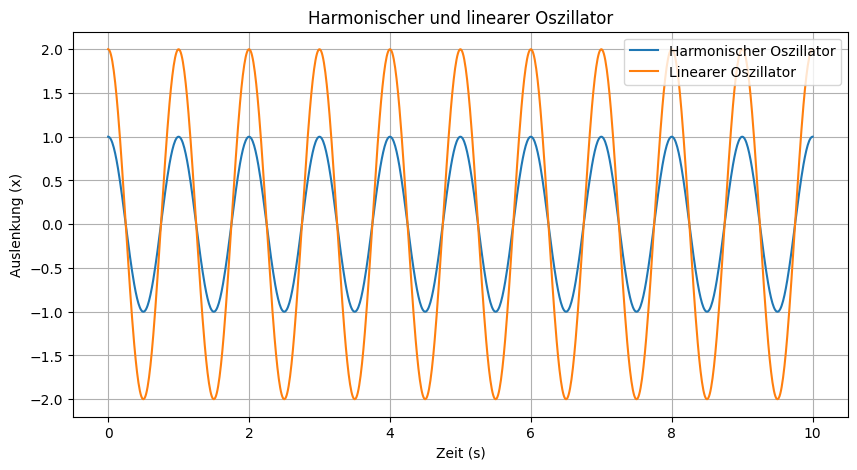

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter festlegen
A = 1  # Amplitude
omega = 2 * np.pi  # Kreisfrequenz (z.B. 1 Hz)
phi = 0  # Phasenverschiebung

# Zeitarray erstellen
t = np.linspace(0, 10, 1000)  # 2 Sekunden, 1000 Punkte

# Harmonischer Oszillator
x_harmonic = A * np.cos(omega * t + phi)

# Linearer Oszillator (z.B. Schwingungsgleichung)
A_lin = 2
x_linear = A_lin * np.exp(0 * omega * t) * np.cos(omega * t + phi)

# Plotten
plt.figure(figsize=(10, 5))
plt.plot(t, x_harmonic, label='Harmonischer Oszillator')
plt.plot(t, x_linear, label='Linearer Oszillator')
plt.xlabel('Zeit (s)')
plt.ylabel('Auslenkung (x)')
plt.title('Harmonischer und linearer Oszillator')
plt.legend()
plt.grid(True)
plt.show()
